## CMPINF 2100 Fall 2021 - Week 13

### Working with Pipelines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read data

In [2]:
data_path = 'quadratic_demo_data.csv'

df = pd.read_csv( data_path )

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   30 non-null     int64  
 1   x       30 non-null     float64
 2   y       30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [3]:
df.head()

,index,x,y
0,0,-0.262910,-0.912386
1,1,0.586244,-0.054693
2,2,0.405813,1.938109
3,3,0.645777,-0.528379
4,4,1.053807,-7.928950


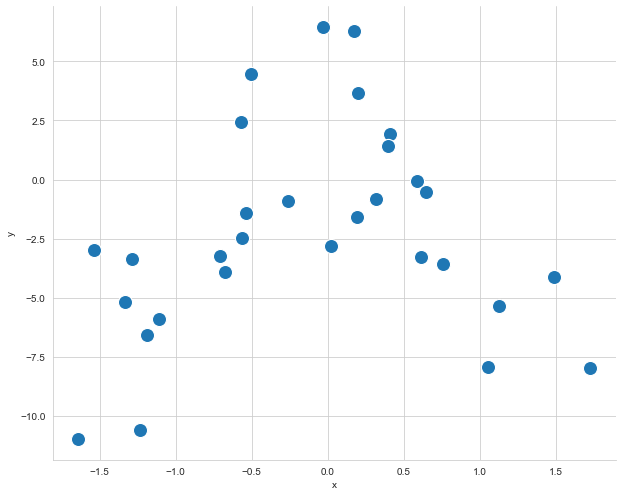

In [5]:
sns.set_style('whitegrid')

sns.relplot(data = df, x='x', y='y', s=200, height=7, aspect=1.25)

plt.show()

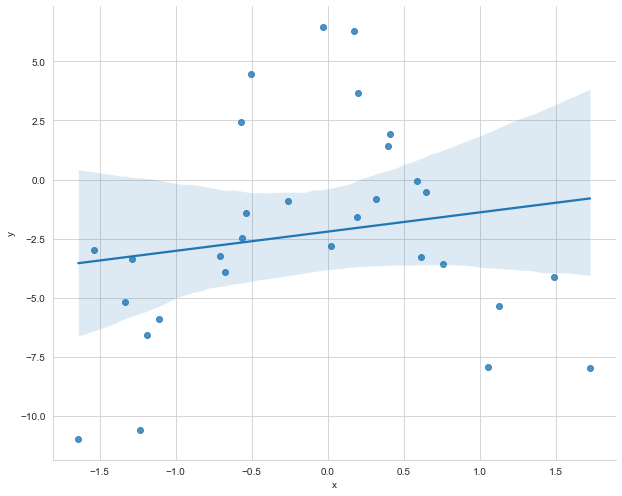

In [7]:
sns.lmplot(data = df, x='x', y='y', height=7, aspect=1.25)

plt.show()

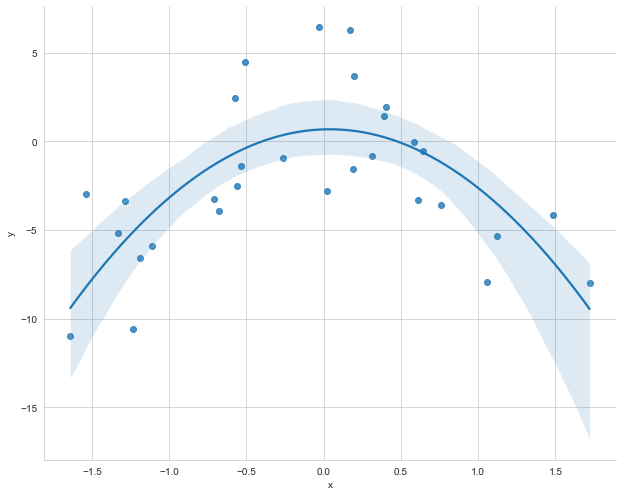

In [8]:
sns.lmplot(data = df, x='x', y='y', order=2, height=7, aspect=1.25)

plt.show()

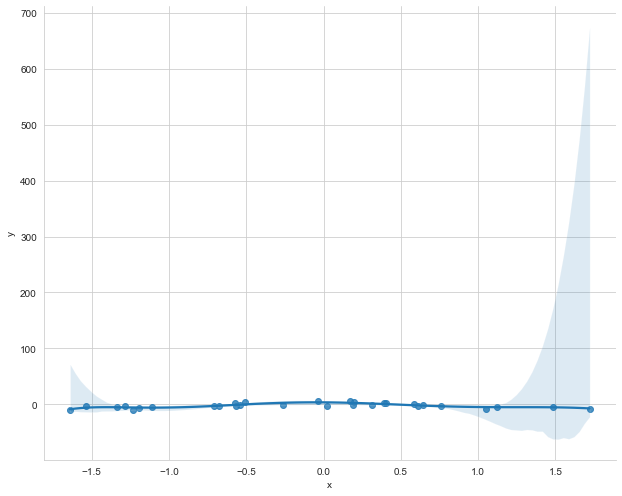

In [9]:
sns.lmplot(data = df, x='x', y='y', order=7, height=7, aspect=1.25)

plt.show()

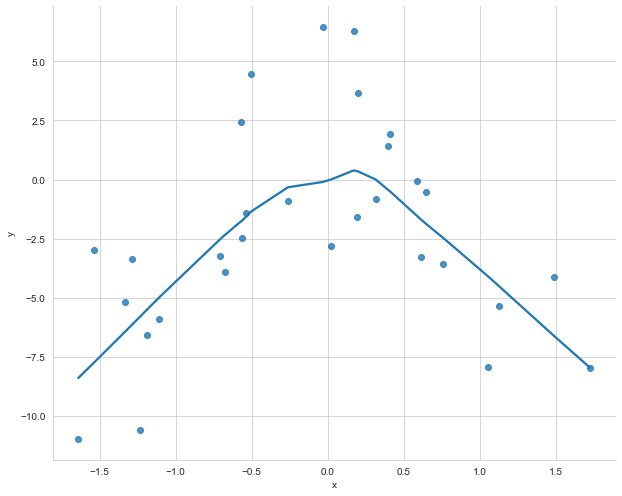

In [10]:
sns.lmplot(data = df, x='x', y='y', lowess=True, height=7, aspect=1.25)

plt.show()

## Formulas

The 8th degree polynomial formula:

In [11]:
formula_8 = 'y ~ x + np.power(x,2) + np.power(x,3) + np.power(x,4) + np.power(x,5) + np.power(x,6) + np.power(x,7) + np.power(x,8) - 1'

In [12]:
['np.power(x, %d)' % d for d in range(2, 8+1)]

['np.power(x, 2)',
 'np.power(x, 3)',
 'np.power(x, 4)',
 'np.power(x, 5)',
 'np.power(x, 6)',
 'np.power(x, 7)',
 'np.power(x, 8)']

In [13]:
" + ".join(['np.power(x, %d)' % d for d in range(2, 8+1)])

'np.power(x, 2) + np.power(x, 3) + np.power(x, 4) + np.power(x, 5) + np.power(x, 6) + np.power(x, 7) + np.power(x, 8)'

In [17]:
'y ~ x + ' + ' + '.join(['np.power(x,%d)' % d for d in range(2, 8+1)]) + ' - 1'

'y ~ x + np.power(x,2) + np.power(x,3) + np.power(x,4) + np.power(x,5) + np.power(x,6) + np.power(x,7) + np.power(x,8) - 1'

In [18]:
formula_8

'y ~ x + np.power(x,2) + np.power(x,3) + np.power(x,4) + np.power(x,5) + np.power(x,6) + np.power(x,7) + np.power(x,8) - 1'

## Preprocessing

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
xinputs = df.loc[:, ['x']].copy()
youtput = df.loc[:, ['y']].copy()

In [21]:
X_train = xinputs.to_numpy()
y_train = youtput.y.to_numpy().ravel()

In [22]:
xinputs.head()

,x
0,-0.262910
1,0.586244
2,0.405813
3,0.645777
4,1.053807


In [24]:
pd.DataFrame(PolynomialFeatures(degree=1).fit_transform(X_train)).head()

,0,1
0,1.0,-0.262910
1,1.0,0.586244
2,1.0,0.405813
3,1.0,0.645777
4,1.0,1.053807


In [25]:
from patsy import dmatrices

In [26]:
y_1, X_1 = dmatrices('y ~ x', data = df, return_type='dataframe')

In [27]:
X_1.head()

,Intercept,x
0,1.0,-0.262910
1,1.0,0.586244
2,1.0,0.405813
3,1.0,0.645777
4,1.0,1.053807


In [28]:
pd.DataFrame(PolynomialFeatures(degree=3).fit_transform(X_train)).head()

,0,1,2,3
0,1.0,-0.262910,0.069121,-0.018173
1,1.0,0.586244,0.343682,0.201481
2,1.0,0.405813,0.164684,0.066831
3,1.0,0.645777,0.417027,0.269307
4,1.0,1.053807,1.110509,1.170262


In [29]:
y_3, X_3 = dmatrices('y ~ x + np.power(x,2) + np.power(x,3)', data = df, return_type='dataframe')

In [30]:
X_3.head()

,Intercept,x,"np.power(x, 2)","np.power(x, 3)"
0,1.0,-0.262910,0.069121,-0.018173
1,1.0,0.586244,0.343682,0.201481
2,1.0,0.405813,0.164684,0.066831
3,1.0,0.645777,0.417027,0.269307
4,1.0,1.053807,1.110509,1.170262


In [32]:
pd.DataFrame(PolynomialFeatures(degree=8, include_bias=False).fit_transform(X_train)).head()

,0,1,2,3,4,5,6,7
0,-0.262910,0.069121,-0.018173,0.004778,-0.001256,0.000330,-0.000087,0.000023
1,0.586244,0.343682,0.201481,0.118117,0.069245,0.040595,0.023798,0.013952
2,0.405813,0.164684,0.066831,0.027121,0.011006,0.004466,0.001813,0.000736
3,0.645777,0.417027,0.269307,0.173912,0.112308,0.072526,0.046836,0.030245
4,1.053807,1.110509,1.170262,1.233231,1.299587,1.369514,1.443203,1.520858


In [33]:
y_sk, X_sk = dmatrices(formula_8, data = df)

In [35]:
pd.DataFrame(X_sk).head()

,0,1,2,3,4,5,6,7
0,-0.262910,0.069121,-0.018173,0.004778,-0.001256,0.000330,-0.000087,0.000023
1,0.586244,0.343682,0.201481,0.118117,0.069245,0.040595,0.023798,0.013952
2,0.405813,0.164684,0.066831,0.027121,0.011006,0.004466,0.001813,0.000736
3,0.645777,0.417027,0.269307,0.173912,0.112308,0.072526,0.046836,0.030245
4,1.053807,1.110509,1.170262,1.233231,1.299587,1.369514,1.443203,1.520858


## Pipelines

In [36]:
from sklearn.pipeline import Pipeline

In [37]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

Define the resampling scheme.

In [38]:
my_cv = KFold(n_splits=5, shuffle=True, random_state=101)

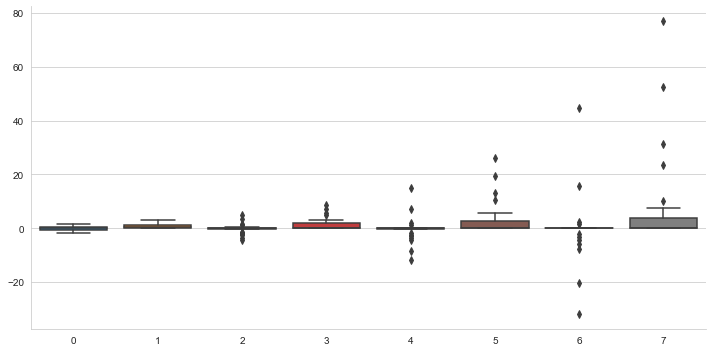

In [39]:
sns.catplot(data = pd.DataFrame(X_sk), kind='box', aspect=2)

plt.show()

In [40]:
poly_wflow = Pipeline(steps = [('std_scale', StandardScaler()), 
                               ('make_poly', PolynomialFeatures(include_bias=False)), 
                               ('std_poly', StandardScaler()), 
                               ('lm', LinearRegression())])

In [41]:
poly_wflow

Pipeline(steps=[('std_scale', StandardScaler()),
                ('make_poly', PolynomialFeatures(include_bias=False)),
                ('std_poly', StandardScaler()), ('lm', LinearRegression())])

The `degree` is the **tuning parameter** we wish to optimize.

We can define a candidate set of tuning parameter values to search over. We call this the **search grid**.

In [42]:
list( range(1, 8+1) )

[1, 2, 3, 4, 5, 6, 7, 8]

We need to create a dictionary to define the parameters that will be searched over. The naming convention is:

`<step name>__<parameter name>`

In [43]:
poly_grid = {'make_poly__degree': list( range(1, 8+1) )}

In [44]:
poly_grid

{'make_poly__degree': [1, 2, 3, 4, 5, 6, 7, 8]}

In [45]:
poly_search = GridSearchCV(poly_wflow, param_grid=poly_grid, cv=my_cv, scoring='neg_mean_squared_error')

In [46]:
poly_search_results = poly_search.fit(X_train, y_train)

In [47]:
poly_search_results.best_params_

{'make_poly__degree': 3}

In [48]:
poly_search_results.best_score_

-11.480868498302515

In [49]:
poly_search_results

GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[('std_scale', StandardScaler()),
                                       ('make_poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('std_poly', StandardScaler()),
                                       ('lm', LinearRegression())]),
             param_grid={'make_poly__degree': [1, 2, 3, 4, 5, 6, 7, 8]},
             scoring='neg_mean_squared_error')

In [50]:
poly_search_results.cv_results_

{'mean_fit_time': array([0.00290971, 0.00221262, 0.00340347, 0.00441289, 0.00363607,
        0.00405164, 0.00474095, 0.00525961]),
 'std_fit_time': array([0.00113182, 0.00073306, 0.00081079, 0.00109039, 0.00109338,
        0.00180645, 0.00025386, 0.00035889]),
 'mean_score_time': array([0.00080557, 0.00058327, 0.00098557, 0.00095797, 0.00136538,
        0.00098629, 0.00147943, 0.00182924]),
 'std_score_time': array([4.02998309e-04, 4.76451971e-04, 3.32845999e-05, 5.44972033e-04,
        4.63201402e-04, 1.06004493e-04, 7.70407801e-04, 1.36164906e-04]),
 'param_make_poly__degree': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'make_poly__degree': 1},
  {'make_poly__degree': 2},
  {'make_poly__degree': 3},
  {'make_poly__degree': 4},
  {'make_poly__degree': 5},
  {'make_poly__degree': 6},
  {'make_poly__degree': 7},
  {'make_poly__degree': 8}],
 'spli

In [51]:
type(poly_search_results.cv_results_)

dict

In [52]:
poly_search_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_make_poly__degree', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [53]:
cv_summary = pd.DataFrame({'degree': poly_search_results.cv_results_['param_make_poly__degree'].data.astype('float64'),
                           'mean_test_score': poly_search_results.cv_results_['mean_test_score'],
                           'std_test_score': poly_search_results.cv_results_['std_test_score']})

In [54]:
cv_summary

,degree,mean_test_score,std_test_score
0,1.0,-22.683779,4.840014
1,2.0,-11.599160,3.137766
2,3.0,-11.480868,3.179449
3,4.0,-14.031678,4.228111
4,5.0,-22.353009,13.494912
5,6.0,-15.869415,5.827872
6,7.0,-44.797632,42.571784
7,8.0,-307.099570,590.533496


In [55]:
my_cv.n_splits

5

In [56]:
cv_summary['mean_se'] = cv_summary.std_test_score / np.sqrt( my_cv.n_splits )

In [57]:
cv_summary

,degree,mean_test_score,std_test_score,mean_se
0,1.0,-22.683779,4.840014,2.164520
1,2.0,-11.599160,3.137766,1.403251
2,3.0,-11.480868,3.179449,1.421893
3,4.0,-14.031678,4.228111,1.890869
4,5.0,-22.353009,13.494912,6.035108
5,6.0,-15.869415,5.827872,2.606304
6,7.0,-44.797632,42.571784,19.038680
7,8.0,-307.099570,590.533496,264.094608


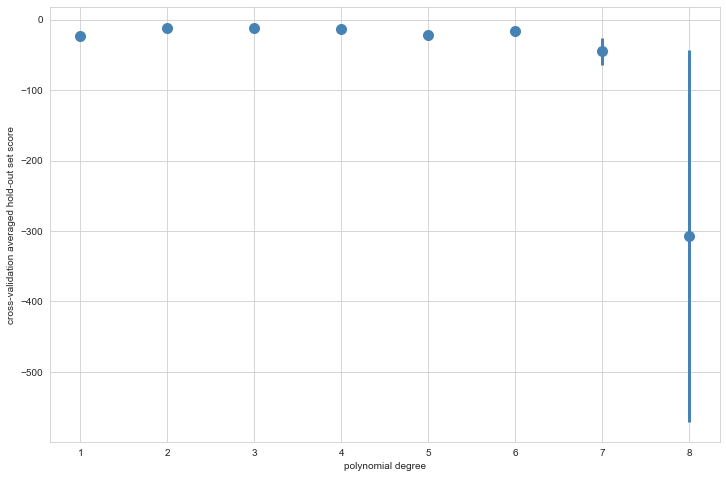

In [58]:
fig, ax = plt.subplots(figsize=(12,8))

ax.errorbar(x=cv_summary.degree,
            y=cv_summary.mean_test_score,
            yerr = cv_summary.mean_se,
            fmt='o', color='steelblue', ecolor='steelblue',
            elinewidth=3, ms=10)

ax.set_xlabel('polynomial degree')
ax.set_ylabel('cross-validation averaged hold-out set score')

plt.show()

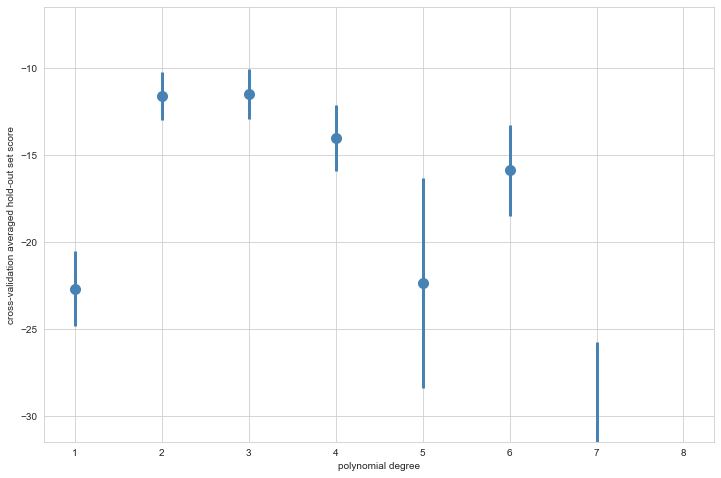

In [59]:
fig, ax = plt.subplots(figsize=(12,8))

ax.errorbar(x=cv_summary.degree,
            y=cv_summary.mean_test_score,
            yerr = cv_summary.mean_se,
            fmt='o', color='steelblue', ecolor='steelblue',
            elinewidth=3, ms=10)

ax.set_ylim([poly_search_results.best_score_ - 20, poly_search_results.best_score_ + 5])

ax.set_xlabel('polynomial degree')
ax.set_ylabel('cross-validation averaged hold-out set score')

plt.show()

## Regularization

Let's go ahead and define another pipeline, this time with the 8th degree polynomial and use Lasso regresssion to tune off the unimportant features.

In [60]:
from sklearn.linear_model import Lasso

In [61]:
lasso_wflow = Pipeline( steps=[('std_input', StandardScaler()), 
                               ('make_poly', PolynomialFeatures(degree=8, include_bias=False)), 
                               ('std_poly', StandardScaler()), 
                               ('lasso', Lasso(fit_intercept=True, max_iter=10001))])

In [62]:
lasso_wflow.steps

[('std_input', StandardScaler()),
 ('make_poly', PolynomialFeatures(degree=8, include_bias=False)),
 ('std_poly', StandardScaler()),
 ('lasso', Lasso(max_iter=10001))]

In [63]:
lasso_grid = {'lasso__alpha': np.exp(np.linspace(-3.5, 3.5, num=121))}

In [64]:
lasso_search = GridSearchCV(lasso_wflow, param_grid=lasso_grid, cv=my_cv, scoring='neg_mean_squared_error')

In [65]:
lasso_search_results = lasso_search.fit(X_train, y_train)

In [66]:
121 * 5

605

In [67]:
lasso_search_results.best_params_

{'lasso__alpha': 0.46844652095263406}

In [68]:
lasso_search_results.best_score_

-11.543538410787136

In [69]:
lasso_search_results.best_estimator_

Pipeline(steps=[('std_input', StandardScaler()),
                ('make_poly', PolynomialFeatures(degree=8, include_bias=False)),
                ('std_poly', StandardScaler()),
                ('lasso', Lasso(alpha=0.46844652095263406, max_iter=10001))])

In [70]:
lasso_search_results.best_estimator_.named_steps

{'std_input': StandardScaler(),
 'make_poly': PolynomialFeatures(degree=8, include_bias=False),
 'std_poly': StandardScaler(),
 'lasso': Lasso(alpha=0.46844652095263406, max_iter=10001)}

In [71]:
lasso_search_results.best_estimator_.named_steps['lasso'].intercept_

-2.2930368375447947

In [72]:
lasso_search_results.best_estimator_.named_steps['lasso'].coef_

array([ 0.48854136, -2.5532377 ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [73]:
X_train[:4, :]

array([[-0.26290962],
       [ 0.58624386],
       [ 0.40581291],
       [ 0.64577666]])

In [74]:
lasso_cv_summary = pd.DataFrame({'alpha': lasso_search_results.cv_results_['param_lasso__alpha'].data.astype('float64'),
                                 'mean_test_score': lasso_search_results.cv_results_['mean_test_score'],
                                 'std_test_score': lasso_search_results.cv_results_['std_test_score']})

In [75]:
lasso_cv_summary['neg_log_alpha'] = -np.log( lasso_cv_summary.alpha )

In [76]:
lasso_cv_summary['mean_se'] = lasso_cv_summary.std_test_score / np.sqrt( my_cv.n_splits )

In [77]:
lasso_cv_summary.head()

,alpha,mean_test_score,std_test_score,neg_log_alpha,mean_se
0,0.030197,-26.103000,23.476792,3.500000,10.499140
1,0.032011,-25.607466,22.806299,3.441667,10.199287
2,0.033934,-25.079339,22.118021,3.383333,9.891480
3,0.035973,-24.530303,21.400323,3.325000,9.570515
4,0.038133,-24.066473,20.858444,3.266667,9.328180


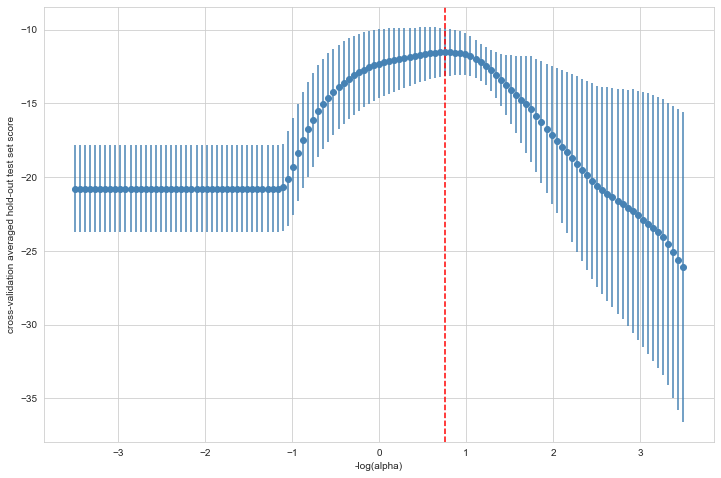

In [78]:
fig, ax = plt.subplots(figsize=(12,8))

ax.errorbar(x=lasso_cv_summary.neg_log_alpha,
            y=lasso_cv_summary.mean_test_score,
            yerr = lasso_cv_summary.mean_se,
            fmt='o', color='steelblue', ecolor='steelblue')

ax.axvline(x=-np.log(lasso_search_results.best_params_['lasso__alpha']), linestyle='dashed', color='red')

ax.set_xlabel('-log(alpha)')
ax.set_ylabel('cross-validation averaged hold-out test set score')

plt.show()